In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/Users/evangray/Desktop/Projects/prosperity/prosperity-3/Data Logs/Round 3/d3dab92a-3183-4454-add8-b614e497477d.csv", delimiter=";")

In [8]:
squid_df = data[data["product"] == "SQUID_INK"].reset_index()

In [15]:
mean = 3
squid_df[f"mean_{mean}"] = squid_df["mid_price"].rolling(window=3).mean()
squid_df[f"std_{mean}"] = squid_df["mid_price"].rolling(window=3).std()

In [16]:
squid_df[f"std_{mean}"]

0           NaN
1           NaN
2      1.154701
3      0.000000
4      0.577350
         ...   
995    0.866025
996    0.288675
997    0.288675
998    0.288675
999    0.763763
Name: std_3, Length: 1000, dtype: float64

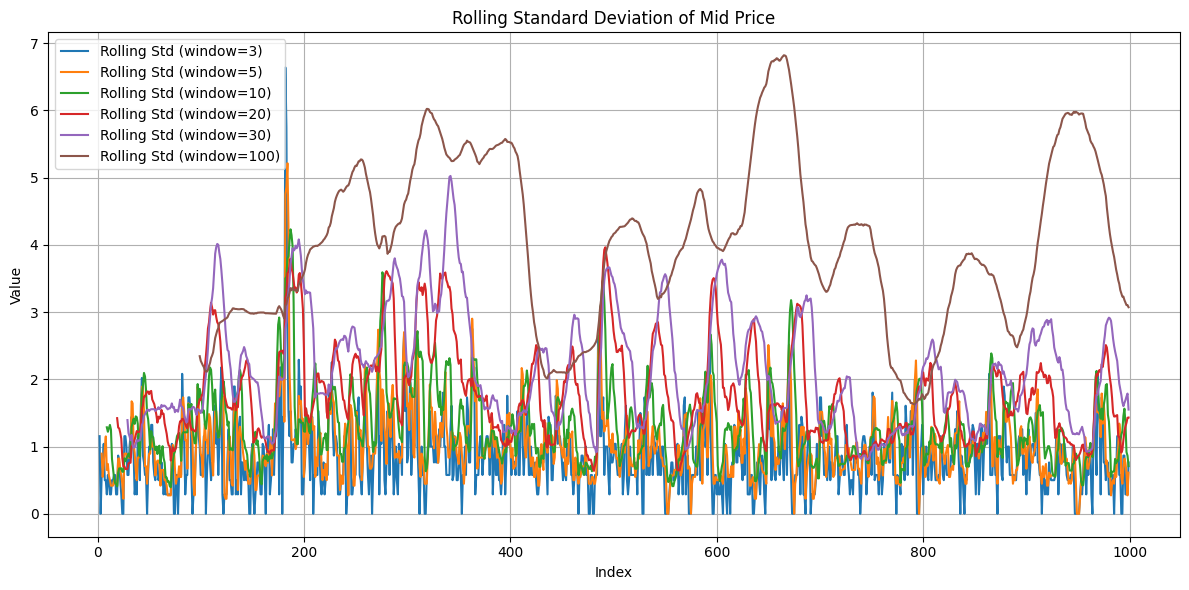

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Example window sizes
window_sizes = [3, 5, 10, 20, 30, 100]

# Calculate rolling standard deviation for each window size
for window in window_sizes:
    squid_df[f"std_{window}"] = squid_df["mid_price"].rolling(window=window).std()

# Plot original and rolling stds
plt.figure(figsize=(12, 6))
# plt.plot(squid_df["mid_price"], label='Mid Price', linewidth=2)

for window in window_sizes:
    plt.plot(squid_df[f"std_{window}"], label=f"Rolling Std (window={window})")

plt.title("Rolling Standard Deviation of Mid Price")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


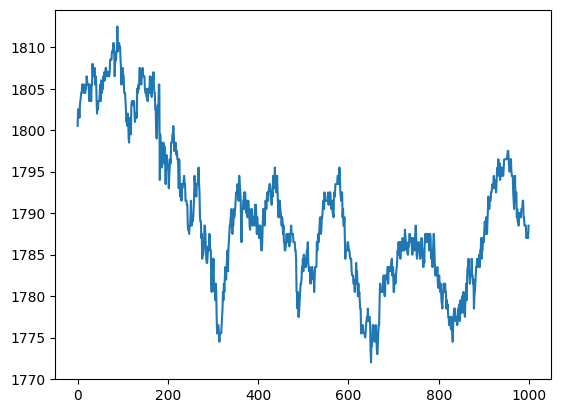

In [21]:
plt.plot(squid_df.mid_price)

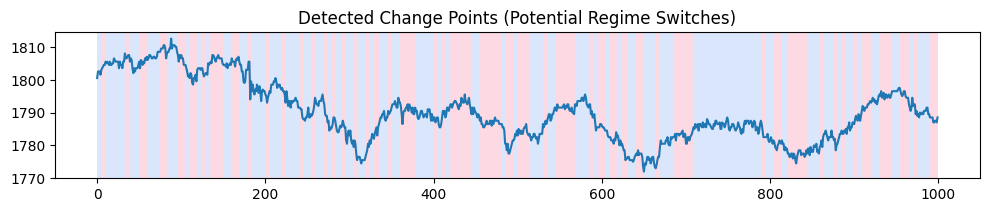

Pocket lengths: [ 5 25  5 10 10 15 10 10 10  5 10  5  5  5 15 10 10 10  5 15  5 15  5 15
  5 10  5 10  5  5  5  5  5 10  5 10  5  5  5 10  5 10 20 20  5  5  5  5
 25 10 25  5 10  5 15 15  5 10 25 15  5  5 10  5 10  5  5 10 10 15  5 15
 25 80  5 10 10  5 25 15  5 10  5  5  5 10  5  5 10 10 15 10 10  5  5 15
 10]
Mean duration: 10.257731958762887
Std duration: 9.006616526073568


In [40]:
from ruptures import Binseg

signal = squid_df['mid_price'].dropna().values
algo = Binseg(model="l2").fit(signal)
change_points = algo.predict(n_bkps=97)  # Change this to tune sensitivity

# Plot the change points
import ruptures as rpt
rpt.display(signal, change_points)
plt.title("Detected Change Points (Potential Regime Switches)")
plt.show()

change_points = algo.predict(n_bkps=97) 
pocket_lengths = np.diff(change_points)
print("Pocket lengths:", pocket_lengths)
print("Mean duration:", np.mean(pocket_lengths))
print("Std duration:", np.std(pocket_lengths))


In [36]:
stds = []
means = []
for i in range(2, 100):
    change_points = algo.predict(n_bkps=i) 
    pocket_lengths = np.diff(change_points)
    means.append(np.mean(pocket_lengths))
    stds.append(np.std(pocket_lengths))
# print("Pocket lengths:", pocket_lengths)
# print("Mean duration:", np.mean(pocket_lengths))
# print("Std duration:", np.std(pocket_lengths))

In [38]:
np.argmin(stds)

97

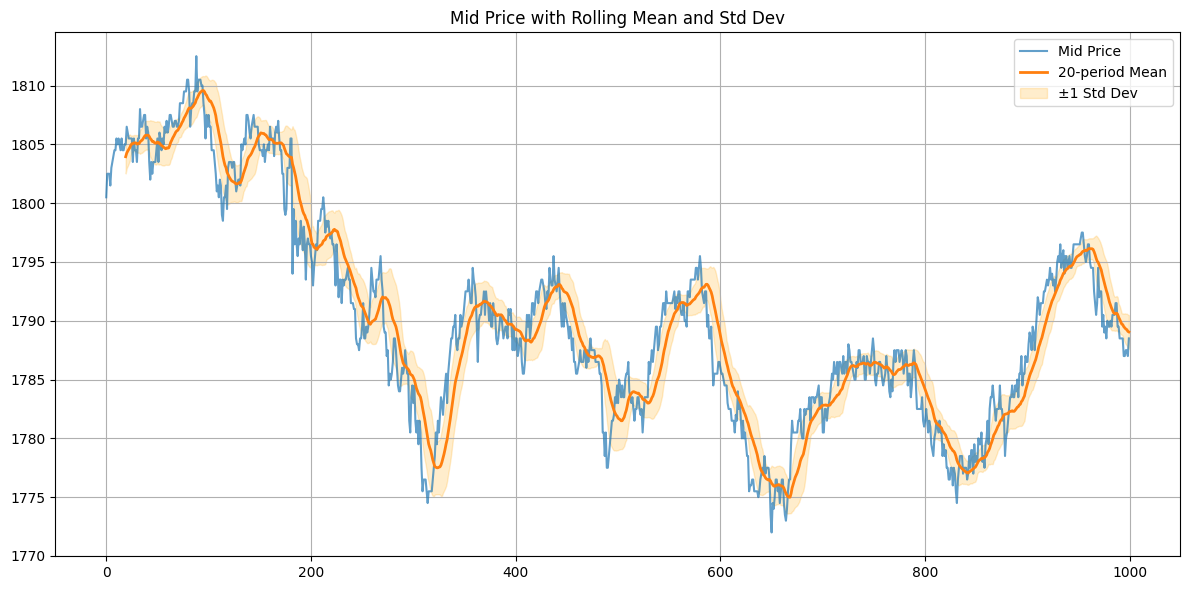

In [26]:
import matplotlib.pyplot as plt

window = 20
squid_df['rolling_mean'] = squid_df['mid_price'].rolling(window).mean()
squid_df['rolling_std'] = squid_df['mid_price'].rolling(window).std()

plt.figure(figsize=(12, 6))
plt.plot(squid_df['mid_price'], label='Mid Price', alpha=0.7)
plt.plot(squid_df['rolling_mean'], label=f'{window}-period Mean', linewidth=2)
plt.fill_between(squid_df.index,
                 squid_df['rolling_mean'] - squid_df['rolling_std'],
                 squid_df['rolling_mean'] + squid_df['rolling_std'],
                 color='orange', alpha=0.2, label='±1 Std Dev')
plt.title("Mid Price with Rolling Mean and Std Dev")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
